In [38]:
import glob
from skimage import measure, filters, segmentation, io, util, morphology, color
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
files = glob.glob('../experiments/Color-Up-1/final-outputs/generated/*.png')

In [3]:
import random

In [4]:
%matplotlib inline

In [5]:
f = random.choice(files)

In [7]:
img = io.imread('../experiments/Color-Up-1/final-outputs/images/56.png')
msk = io.imread('../experiments/Color-Up-1/final-outputs/masks/56.png')
gen = io.imread('../experiments/Color-Up-1/final-outputs/generated/56.png')

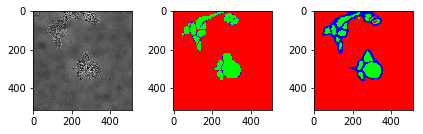

In [16]:
f, axs = plt.subplots(1, 3)
f.tight_layout()
axs[0].imshow(img)
axs[1].imshow(msk)
axs[2].imshow(gen)

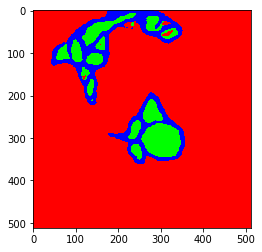

In [19]:
plt.imshow(gen)

In [20]:
gen_g = gen[:, :, 1]

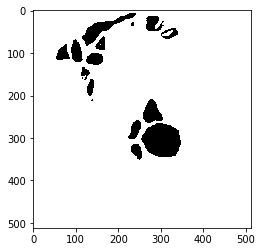

In [21]:
plt.imshow(gen_g, cmap='binary')

In [36]:
labels = measure.label(gen_g)

In [41]:
labels_rgb = color.label2rgb(labels, img)

In [43]:
io.imsave('/tmp/ovarlay.png', labels_rgb)

/home/dhruv/.local/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [45]:
regs = measure.regionprops(labels)

/usr/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


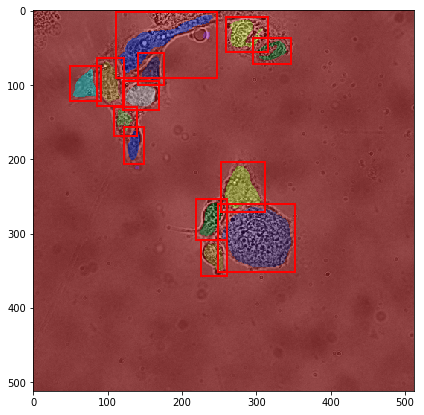

In [50]:
fig, ax = plt.subplots( figsize=(7,7))
ax.imshow(labels_rgb)
for prop in regs:
    if prop.area > 100 and prop.solidity > .4:
        minr, minc, maxr, maxc = prop.bbox
        patch = mpatches.Rectangle((minc-5, minr-5), maxc-minc+10, maxr-minr+10, fill=False, linewidth=2, edgecolor='red')
        ax.add_patch(patch)
fig.show()

In [55]:
from skimage import transform

In [56]:
img = io.imread('../../Data/Images/C - 1(fld 029 wv TL-Brightfield - dsRed).tif')

In [57]:
img = transform.resize(img, (512, 512), order=2)

/home/dhruv/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dhruv/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dhruv/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:812: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  warn("Bi-quadratic interpolation behavior 

In [80]:
isodata = filters.threshold_isodata(gray)

In [73]:
gray = color.rgb2gray(gen)

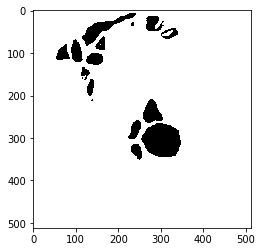

In [82]:
plt.imshow(gray > isodata, cmap='binary')